In [1]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
#import seaborn as sns

In [12]:
episodes_rewards1 = genfromtxt('logs/extended_paper/run51-rewards-regulator.csv', delimiter=', ')
episodes_rewards2 = genfromtxt('logs/extended_paper/run52-rewards-regulator.csv', delimiter=', ')
episodes_rewards3 = genfromtxt('logs/extended_paper/run53-rewards-regulator.csv', delimiter=', ')
episodes_rewards4 = genfromtxt('logs/extended_paper/run54-rewards-regulator.csv', delimiter=', ')
episodes_rewards5 = genfromtxt('logs/extended_paper/run55-rewards-regulator.csv', delimiter=', ')
episodes_rewards6 = genfromtxt('logs/extended_paper/run56-rewards-regulator.csv', delimiter=', ')
episodes_rewards7 = genfromtxt('logs/extended_paper/run57-rewards-regulator.csv', delimiter=', ')
episodes_rewards8 = genfromtxt('logs/extended_paper/run58-rewards-regulator.csv', delimiter=', ')
episodes_rewards9 = genfromtxt('logs/extended_paper/run59-rewards-regulator.csv', delimiter=', ')
episodes_rewards10 = genfromtxt('logs/extended_paper/run60-rewards-regulator.csv', delimiter=', ')

In [13]:
min_episodes = min(len(episodes_rewards1), len(episodes_rewards2), len(episodes_rewards3), 
                   len(episodes_rewards4), len(episodes_rewards5), len(episodes_rewards6), 
                   len(episodes_rewards7), len(episodes_rewards8), len(episodes_rewards9), len(episodes_rewards10))

In [14]:
episodes_rewards1 = episodes_rewards1[:min_episodes]
episodes_rewards2 = episodes_rewards2[:min_episodes]
episodes_rewards3 = episodes_rewards3[:min_episodes]
episodes_rewards4 = episodes_rewards4[:min_episodes]
episodes_rewards5 = episodes_rewards5[:min_episodes]
episodes_rewards6 = episodes_rewards6[:min_episodes]
episodes_rewards7 = episodes_rewards7[:min_episodes]
episodes_rewards8 = episodes_rewards8[:min_episodes]
episodes_rewards9 = episodes_rewards9[:min_episodes]
episodes_rewards10 = episodes_rewards10[:min_episodes]

In [15]:
concatenated_rewards = np.concatenate([episodes_rewards1, episodes_rewards2[:,[1]], episodes_rewards3[:,[1]],
                                       episodes_rewards4[:,[1]], episodes_rewards5[:,[1]], episodes_rewards6[:,[1]],
                                       episodes_rewards7[:,[1]], episodes_rewards8[:,[1]], episodes_rewards9[:,[1]],
                                       episodes_rewards10[:,[1]]], axis=1)
rewards_means = concatenated_rewards[:,1:].mean(axis=1)
rewards_stds = concatenated_rewards[:,1:].std(axis=1)
rewards_means

array([347371.19886655, 148829.62335992,  94204.95589967, ...,
       520847.40005689, 508634.33686721, 519219.49700615])

In [16]:
rewards_stds

array([126834.31659407, 140485.61515195,  86290.04113969, ...,
       124212.51724941, 119910.57081842,  89023.82384378])

In [26]:
no_regulator_rewards1 = genfromtxt('logs/extended_paper/run1-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards2 = genfromtxt('logs/extended_paper/run2-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards3 = genfromtxt('logs/extended_paper/run3-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards4 = genfromtxt('logs/extended_paper/run4-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards5 = genfromtxt('logs/extended_paper/run5-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards6 = genfromtxt('logs/extended_paper/run6-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards7 = genfromtxt('logs/extended_paper/run7-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards8 = genfromtxt('logs/extended_paper/run8-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards9 = genfromtxt('logs/extended_paper/run9-rewards-no-regulator.csv', delimiter=', ')
no_regulator_rewards10 = genfromtxt('logs/extended_paper/run10-rewards-no-regulator.csv', delimiter=', ')

In [27]:
no_regulator_rewards1 = no_regulator_rewards1[:min_episodes]
no_regulator_rewards2 = no_regulator_rewards2[:min_episodes]
no_regulator_rewards3 = no_regulator_rewards3[:min_episodes]
no_regulator_rewards4 = no_regulator_rewards4[:min_episodes]
no_regulator_rewards5 = no_regulator_rewards5[:min_episodes]
no_regulator_rewards6 = no_regulator_rewards6[:min_episodes]
no_regulator_rewards7 = no_regulator_rewards7[:min_episodes]
no_regulator_rewards8 = no_regulator_rewards8[:min_episodes]
no_regulator_rewards9 = no_regulator_rewards9[:min_episodes]
no_regulator_rewards10 = no_regulator_rewards10[:min_episodes]

In [28]:
concatenated_no_regulator_rewards = np.concatenate([no_regulator_rewards1, no_regulator_rewards2[:,[1]], no_regulator_rewards3[:,[1]],
                                       no_regulator_rewards4[:,[1]], no_regulator_rewards5[:,[1]], no_regulator_rewards6[:,[1]],
                                       no_regulator_rewards7[:,[1]], no_regulator_rewards8[:,[1]], no_regulator_rewards9[:,[1]],
                                       no_regulator_rewards10[:,[1]]], axis=1)
no_regulator_rewards_means = concatenated_no_regulator_rewards[:,1:].mean(axis=1)
no_regulator_rewards_stds = concatenated_no_regulator_rewards[:,1:].std(axis=1)

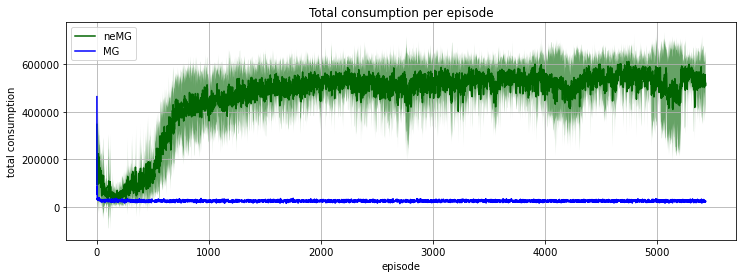

In [31]:
x = episodes_rewards1[:,0]
y1 = rewards_means
y2 = no_regulator_rewards_means

fig, ax = plt.subplots(figsize=(12,4))

ax.set(xlabel='episode', ylabel='total consumption',
       title='Total consumption per episode')
ax.grid()

ax.set_facecolor('white')

ax.plot(x, y1, color='darkgreen', label='neMG')
ax.plot(x, y2, color='blue', label='MG')

ax.fill_between(x1, y1+rewards_stds, y1-rewards_stds, facecolor='darkgreen', alpha=0.6)

plt.legend(loc='upper left')

fig.savefig("total_consumption_plot.png")
plt.show()